<a href="https://colab.research.google.com/github/Zachary-Fernandes/CSCI-6962/blob/main/fernazHW6v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6
#####Zachary Fernandes
#####Projects in Machine Learning and AI

### Markov Decision Processes (MDP)

As demonstrated by [this article](https://towardsdatascience.com/real-world-applications-of-markov-decision-process-mdp-a39685546026), we can formulate a game show as an MDP. One round in this game involves asking a participant a question. If they answer correctly, they earn money, but if they answer incorrectly, they lose all their earned money. Answering correctly also means the participant can either choose to continue to the next round or quit and keep all their money. As rounds increase in number, their rewards also grow, but they become more and more challenging. For example, our game could last fifteen rounds

The state space would include each of the rounds along with an end game state.

The action space would be the choices a player can make, those being playing the next round or quitting.

The transition model would focus on what actions the player takes. If they play the next round, they may win or lose that round. Winning means moving to the next round with some probability _p_; the reward the player earns is how much is offered for the current round. If the player wins the last round, they earn the final prize and move to the end game state as no rounds remain. Losing means losing all their money and moving to the end game state with 1 - _p_ probability. If the player chooses to quit, they move to the end game state without any further reward and probability 1.

The reward is how much money a player earns for a correct answer. This reward increases as the round number increases. Additionally, as the reward value and round number increase, the probability of answering correctly decreases.

### Reinforcement Learning (RL) in Healthcare

One issue with healthcare that can be more effectively solved by RL is creating and configuring dynamic treatment regimes (DTRs). A DTR is, as put by [CapeStart](https://www.capestart.com/resources/blog/reinforcement-learning-in-health-care-why-its-important-and-how-it-can-help/), a sequence of rules that determine healthcare decisions, such as types of treatment, dosages of drugs, and timing of appointments. These are tailored to a specific patient based on medical history and conditions. For an RL algorithm, clinical observations and patient assessments would be its input data, and treatment options would be its output. This is done to reach the patient's most desired environmental state.

RL can help automate decision-making while treatment regimes proceed, design DTRs for chronic conditions, and improve critical care from intensive care data. One open-source approach to this problem is [pydtr](https://github.com/fullflu/pydtr). pydtr is a Python library that conducts DTRs, and it can select optimal treatments for specific patients with sklearn-based interfaces. It conducts these DTRs through a regression version of Iterative Q-Learning. It is possible to use sklearn-based models or statsmodels-based models - if one is using the sklearn model for a regression function and there are categorical independent variables, one must encode the categorical variables prior to using the model.

### Tic-Tac-Toe

This code creates an RL agent that competes against an irrational agent that chooses its moves at random. The intelligent agent uses tabular Q-learning to learn how to defeat the unintelligent agent.

The evaluation metrics I will be using are the Player 1 win rate, the Player 2 win rate, and the draw rate. These are calculated after training and testing.

Online Resources that Helped:

[Framing Tic-Tac-Toe as a Reinforcement Learning Problem](https://levelup.gitconnected.com/framing-tic-tac-toe-as-a-reinforcement-learning-problem-eb76b6ece4de)

[Setting up Tic-Tac-Toe for Reinforcement Learning in Python](https://levelup.gitconnected.com/setting-up-tic-tac-toe-for-reinforcement-learning-in-python-43e2f42cfce8)

[Tabular Q-Learning Agent vs. Irrational Agent in the Game of Tic-Tac-Toe](https://levelup.gitconnected.com/tabular-q-learning-agent-vs-irrational-agent-in-the-game-of-tic-tac-toe-6de6c85f0c42)

[Reinforcement Learning — Implement TicTacToe](https://towardsdatascience.com/reinforcement-learning-implement-tictactoe-189582bea542)

This notebook features training an RL agent against an irrational agent that chooses actions at random. There is [another notebook](https://github.com/Zachary-Fernandes/CSCI-6962/blob/main/fernazHW6v5.ipynb), albeit less well-documented than this, that trains two Q-learning RL agents against each other, and a human can then challenge one of them.

#### Setup

In [1]:
!pip install imbalanced-learn
!pip install graphviz
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kecabxzb
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-kecabxzb
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184426 sha256=fb1a70397821ada45e1df253daf8ec0f2325bd4f6732ad5b573d06997180bcbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-6nukigur/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import utils

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import IPython
import IPython.display

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

import os
import zipfile

import glob
import imageio
import PIL
import tensorflow_probability as tfp
import time
import tensorflow_docs.vis.embed as embed

from scipy import ndimage, misc
import cv2

#### Board Checking

In [3]:
def check_over(x, printFlag = 0):
    """
    Takes in the current board state x and a flag of whether or not to print
    output, determines if the game is won by either player or if the game ends
    in a draw.
    Returns True if episode is over. 
    Returns False if episode is not over. 
    Also, returns a string '1' if Player 1 has won,
    a string '2' if Player 2 has won, or
    a string '3' if there is a draw. 
    """
    # Check if Player 1 won
    # First check each row
    # Then check each column
    # Finally check each diagonal
    if np.prod(x[0,:]) == 1 or np.prod(x[1,:]) == 1 or np.prod(x[2,:]) == 1 or \
        np.prod(x[:,0]) == 1 or np.prod(x[:,1]) == 1 or np.prod(x[:,2]) == 1 or \
        np.prod(np.diag(x)) == 1 or np.prod(np.diag(np.rot90(x))) == 1:
        if printFlag == 1:
            # Printing occurs during some testing
            # and human matches
            print("Player 1 won!")
        done = True
        player_win = '1'
        return done, player_win

    # Check if Player 2 won
    # First check each row
    # Then check each column
    # Finally check each diagonal
    if np.sum(x[0,:]) == 6 or np.sum(x[1,:]) == 6 or np.sum(x[2,:]) == 6 or \
        np.sum(x[:,0]) == 6 or np.sum(x[:,1]) == 6 or np.sum(x[:,2]) == 6 or \
        np.sum(np.diag(x)) == 6 or np.sum(np.diag(np.rot90(x))) == 6:
        if printFlag == 1:
            print("Player 2 won!")
        done = True
        player_win = '2'
        return done, player_win

    # Check if a draw occurred 
    if np.all(x):
        if printFlag == 1:
            print("Draw!")
        done = True
        player_win = 'd'
        return done, player_win
    # Match is not over
    return False, ' '

#### RL Parameter Setup

In [4]:
# Player symbols - P1 = X, P2 = O
symbols = {1: 'X', 2: 'O'}

# Max number of state values per cell
max_vals = 3
# Max number of controls (actions)
max_controls = 9
# Create two Q-matrices
# The first nine dimensions are reserved for states
# The tenth dimension is for controls
Qvals = np.zeros((max_vals, max_vals, max_vals, max_vals, max_vals,
                  max_vals, max_vals, max_vals, max_vals, max_controls))

In [5]:
# Learning rate
alpha = 0.9
# Discount factor
gamma = 0.99
# Value that determines the probability the agent will
# use a random control (exploration) or use its Q-table
# for the best control (exploitation)
# Epsilon = 1.0 means only exploring controls is done at the start, and as
# it decays, the RL agent will begin exploiting more and more controls
# This is a key part of the epsilon-greedy approach used in this program
epsilon = 1.0

# How long to train
epochs = 100000

# Track training metrics for Player 1 wins, Player 2 wins, and draws
winP1 = np.zeros((epochs,))
winP2 = np.zeros((epochs,))
draw = np.zeros((epochs,))

# 20 epsilon decay intervals
decayStages = 20
# How long each decay interval lasts
stageLength = epochs // decayStages
# How much we decay epsilon by for each stage
decayFactor = 0.7

In [6]:
print('Q-table: ', Qvals.shape)

Q-table:  (3, 3, 3, 3, 3, 3, 3, 3, 3, 9)


#### RL Helper Functions

In [7]:
def control_train(x, epsilon, controls, Qvals):
    """
    Take in current board position x, epsilon (probability for random control),
    control space, and Q-table being learned.
    Return eithers a random control (exploration) or the best possible control
    according to the Q-table (exploitation) depending on the epsilon-greedy
    policy.
    """
    if np.random.random() >= epsilon:
        # Exploitation time - choose best control according to Q-table
        u = np.argmax(Qvals[x])

        # First check if u is a possible control
        if u not in controls:
            # We cannot exploit - our fallback is to explore
            new_control = np.random.choice(list(controls))
            return new_control
        else:
            # We can exploit with u
            return u
    else:
        # Exploration time - choose random control
        u = np.random.choice(list(controls))
        return u

In [8]:
def control_test(x, controls, Qvals):
    """
    Take in current board position x, control space, and trained Q-table.
    Return an intelligent control determined by the knowledge stored in the
    Q-table (exploitation).
    """
    u = np.argmax(Qvals[x])
    
    # First check if u is a possible control
    if u not in controls:
        # We cannot exploit - our fallback is to explore
        new_control = np.random.choice(list(controls))
        return new_control
    else:
        # We can exploit with u
        return u

In [9]:
def decay_epsilon(episode, epsilon, stageLength, decayFactor):
    # Decays epsilon at a new period
    if episode % stageLength == 0 and episode != 0:
        epsilon *= decayFactor
        print(f'epsilon = {epsilon}')
    return epsilon

In [10]:
def reset():
    # Resets the control space at each epoch's beginning
    controls = set()
    for i in range(9):
        controls.add(i)
    return controls

In [11]:
def batch_update(statesRL, controlsRL, r, nextStatesRL, gamma, alpha, Qvals):
    """
    Agent learns from the state-control moves that led to a specific outcome,
    with reward or penalty r being applied. This implements the Q-table update
    rule. Updating the Q-table for the state-control pair on the game's end led
    to slow learning, which is why we employ batch learning across all the
    state-control actions.
    """
    # Employ batch learning on all state-control actions
    for i, boardVals in enumerate(statesRL):
        u = controlsRL[i]
        boardValsNext = nextStatesRL[i]
        td_target = r + gamma * np.max(Qvals[boardValsNext])
        td_error = td_target - Qvals[boardVals][u]
        Qvals[boardVals][u] += alpha * td_error
    return Qvals

#### Training

In [12]:
"""
Training Cell
"""

# Reward for winning a game
reward = 10

# Loop over each epoch
for epoch in range(epochs):
    # Print which epoch this is to see if it hangs
    if epoch % 1000 == 0:
        print(epoch)
    # Hold agent's states and controls to easily update the Q-table
    statesRL = []
    controlsRL = []
    nextStatesRL = []

    done = False
    controls = reset()

    # Starting board state - empty
    boardVals = np.zeros((3,3))
    turn = 0
    # Visual representation of the board
    board = np.array([[' ', ' ', ' '],
                      [' ', ' ', ' '],
                      [' ', ' ', ' ']])
    # Decay epsilon as needed
    epsilon = decay_epsilon(epoch, epsilon, stageLength, decayFactor)

    # Game loop
    while done != True:
        # Determine which player's turn it is
        if turn % 2 == 0:
            # Player 1's turn
            # Epsilon-greedy training policy
            u = control_train(tuple(boardVals.reshape(-1,).astype(int)),
                              epsilon, controls, Qvals)
            statesRL.append(tuple(boardVals.reshape(-1,).astype(int)))
            controlsRL.append(u)
            # Using a move, remove it
            controls.remove(u)
            # Update board state
            boardValsNext = boardVals.reshape(-1,)
            boardValsNext[u] = 1
            boardValsNext = boardValsNext.reshape(3,3)
            nextStatesRL.append(tuple(boardValsNext.reshape(-1,).astype(int)))
            # Update visual representation
            board = board.reshape(-1,)
            board[u] = symbols[1]
            board = board.reshape(3,3)

            # Determine if the game finished
            done, winner = check_over(boardVals)
            if done == True:
                if winner == '1':
                    # Player 1 (agent) learns from moves responsible for winning
                    Qvals = batch_update(statesRL,
                                         controlsRL,
                                         reward,
                                         nextStatesRL,
                                         gamma,
                                         alpha,
                                         Qvals)
                    winP1[epoch] = 1
                elif winner == 'd':
                    # Game draw, neither player wins
                    draw[epoch] = 1
            # Update board state, move to next turn
            boardVals = boardValsNext
            turn += 1
        else:
            # Player 2's turn
            u = np.random.choice(list(controls))
            # Using a move, remove it
            controls.remove(u)
            # Update board state
            boardVals = boardVals.reshape(-1,)
            boardVals[u] = 2
            boardVals = boardVals.reshape(3,3)
            # Update visual representation
            board = board.reshape(-1,)
            board[u] = symbols[2]
            board = board.reshape(3,3)
            turn += 1

            # Determine if the game finished
            done, winner = check_over(boardVals)
            if done == True:
                if winner == '2':
                    # Player 2 wins
                    winP2[epoch] = 1
                elif winner == 'd':
                    # Game draw, neither player wins
                    draw[epoch] = 1

0
1000
2000
3000
4000
5000
epsilon = 0.7
6000
7000
8000
9000
10000
epsilon = 0.48999999999999994
11000
12000
13000
14000
15000
epsilon = 0.3429999999999999
16000
17000
18000
19000
20000
epsilon = 0.24009999999999992
21000
22000
23000
24000
25000
epsilon = 0.16806999999999994
26000
27000
28000
29000
30000
epsilon = 0.11764899999999995
31000
32000
33000
34000
35000
epsilon = 0.08235429999999996
36000
37000
38000
39000
40000
epsilon = 0.05764800999999997
41000
42000
43000
44000
45000
epsilon = 0.04035360699999998
46000
47000
48000
49000
50000
epsilon = 0.028247524899999984
51000
52000
53000
54000
55000
epsilon = 0.019773267429999988
56000
57000
58000
59000
60000
epsilon = 0.01384128720099999
61000
62000
63000
64000
65000
epsilon = 0.009688901040699992
66000
67000
68000
69000
70000
epsilon = 0.006782230728489994
71000
72000
73000
74000
75000
epsilon = 0.004747561509942996
76000
77000
78000
79000
80000
epsilon = 0.003323293056960097
81000
82000
83000
84000
85000
epsilon = 0.0023263051398720

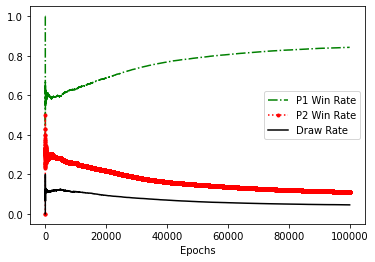

In [13]:
# Compute Player 1 win rate, Player 2 win rate, and draw rate averages
winTotP1 = np.cumsum(winP1)
winTotP2 = np.cumsum(winP2)
drawTot = np.cumsum(draw)

winRateP1 = np.zeros(epochs,)
winRateP2 = np.zeros(epochs,)
drawRate = np.zeros(epochs,)

for e in range(epochs):
    winRateP1[e] = winTotP1[e] / (e + 1)
    winRateP2[e] = winTotP2[e] / (e + 1)
    drawRate[e] = drawTot[e] / (e + 1)

# Plot these rates over epochs
plt.figure()
plt.plot(np.arange(epochs), winRateP1, 'g-.', label = 'P1 Win Rate')
plt.plot(np.arange(epochs), winRateP2, 'r:.', label = 'P2 Win Rate')
plt.plot(np.arange(epochs), drawRate, 'k-', label = 'Draw Rate')
plt.xlabel('Epochs')
plt.legend()

In [14]:
# From the above, we can see our RL agent is learning to beat the irrational
# agent, with P1's win rate increasing while P2's win rate and the draw rate
# decrease. This implies the RL agent is learning an effective policy.
winRateP1[-1]

0.84269

In [15]:
winRateP2[-1]

0.11153

In [16]:
drawRate[-1]

0.04578

In [17]:
# Sanity check for these values to add up
winRateP1[-1] + winRateP2[-1] + drawRate[-1]

1.0

#### Testing

In [18]:
"""
Testing Cell
"""

def test(Qvals, epochs):
    """
    Uses the learned Q-table to its fullest, testing against the irrational
    agent for a number of epochs.
    """
    # Track metrics for evaluation - Player 1 wins, Player 2 wins, and draws
    winP1 = 0
    winP2 = 0
    draw = 0
    # Symbols: P1 = X, P2 = O
    symbols = {1: 'X', 2: 'O'}

    # Run for epochs
    for epoch in range(epochs):
        done = False
        controls = reset()

        # Starting board state - empty
        boardVals = np.zeros((3,3))
        turn = 0
        # Visual representation of the board
        board = np.array([[' ', ' ', ' '],
                          [' ', ' ', ' '],
                          [' ', ' ', ' ']])

        # Demonstrate five test runs
        if epoch % (epochs // 5) == 0:
            print(f'Episode {epoch}, turn = {turn}, \n', board)

        # Game loop
        while done != True:
            # Determine which player's turn it is
            if turn % 2 == 0:
                # Player 1's turn
                # Epsilon-greedy policy
                u = control_test(tuple(boardVals.reshape(-1,).astype(int)),
                                 controls, Qvals)
                # Using a move, remove it
                controls.remove(u)
                # Update board state
                boardValsNext = boardVals.reshape(-1,)
                boardValsNext[u] = 1
                boardValsNext = boardValsNext.reshape(3,3)
                # Update visual representation
                board = board.reshape(-1,)
                board[u] = symbols[1]
                board = board.reshape(3,3)

                # Update board state, move to next turn
                boardVals = boardValsNext
                turn += 1

                # Demonstrate five test runs
                # Determine if the game finished
                if epoch % (epochs // 5) == 0:
                    print(f'Episode {epoch}, turn = {turn}, \n', board)
                    done, winner = check_over(boardVals, 1)
                else:
                    done, winner = check_over(boardVals)
                
                if done:
                    if winner == '1':
                        # Player 1 win
                        winP1 += 1
                    elif winner == '2':
                        # Player 2 win
                        winP2 += 1
                    elif winner == 'd':
                        # Draw, neither win
                        draw += 1
                
            else:
                # Player 2's turn
                u = np.random.choice(list(controls))
                # Using a move, remove it
                controls.remove(u)
                # Update board state
                boardVals = boardVals.reshape(-1,)
                boardVals[u] = 2
                boardVals = boardVals.reshape(3,3)
                # Update visual representation
                board = board.reshape(-1,)
                board[u] = symbols[2]
                board = board.reshape(3,3)
                turn += 1

                # Demonstrate five test runs
                # Determine if the game finished
                if epoch % (epochs // 5) == 0:
                    print(f'Episode {epoch}, turn = {turn}, \n', board)
                    done, winner = check_over(boardVals, 1)
                else:
                    done, winner = check_over(boardVals)

                if done:
                    if winner == '1':
                        # Player 1 win
                        winP1 += 1
                    elif winner == '2':
                        # Player 2 win
                        winP2 += 1
                    elif winner == 'd':
                        # Draw, neither win
                        draw += 1

    # Compute Player 1 win, Player 2 win, and draw rates
    winRateP1 = winP1 / epochs
    winRateP2 = winP2 / epochs
    drawRate = draw / epochs

    return winRateP1, winRateP2, drawRate

In [19]:
testEpochs = 10000
winRateP1, winRateP2, drawRate = test(Qvals, testEpochs)

Episode 0, turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 0, 
 [['X' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 2, 
 [['X' ' ' ' ']
 ['O' ' ' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 2, 
 [['X' 'X' ' ']
 ['O' ' ' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 4, 
 [['X' 'X' ' ']
 ['O' ' ' ' ']
 [' ' 'O' ' ']]
Episode 0, turn = 4, 
 [['X' 'X' 'X']
 ['O' ' ' ' ']
 [' ' 'O' ' ']]
Player 1 won!
Episode 2000, turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 0, 
 [['X' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 2, 
 [['X' ' ' ' ']
 [' ' 'O' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 2, 
 [['X' 'X' ' ']
 [' ' 'O' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 4, 
 [['X' 'X' ' ']
 [' ' 'O' ' ']
 ['O' ' ' ' ']]
Episode 2000, turn = 4, 
 [['X' 'X' 'X']
 [' ' 'O' ' ']
 ['O' ' ' ' ']]
Player 1 won!
Episode 4000, turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 4000, turn = 0, 
 [['X' ' ' ' ']
 [' ' ' ' ' '

In [20]:
# These test results corroborate how well this policy performs
winRateP1

0.8989

In [21]:
winRateP2

0.0709

In [22]:
drawRate

0.0302

In [23]:
# Sanity check for these values to add up
winRateP1 + winRateP2 + drawRate

1.0

#### AI versus Human

In [24]:
"""
Pit the RL agent (Player 1) against a human (Player 2)
"""

def testHuman(Qvals):
    # Keep track of evaluation metrics
    winP1 = 0
    winP2 = 0
    draw = 0
    # Symbols: P1 = X, P2 = O
    symbols = {1: 'X', 2: 'O'}
    # Count the rounds (replacement for epochs)
    round = 0

    # Human decides whether to keep playing or end the session.
    while int(input('Play (input 1) or exit (input 0)? ')) != 0:
        round += 1
        print('Round', round)
        done = False
        controls = reset()

        # Starting board state - empty
        boardVals = np.zeros((3,3))
        turn = 0
        # Visual representation of the board
        board = np.array([[' ', ' ', ' '],
                          [' ', ' ', ' '],
                          [' ', ' ', ' ']])

        print(f'Turn = {turn}, \n', board)

        while done != True:
            # Determine which player's turn it is
            if turn % 2 == 0:
                # Player 1's turn - AI
                u = control_test(tuple(boardVals.reshape(-1,).astype(int)),
                                 controls, Qvals)
                # Using a move, remove it
                controls.remove(u)
                # Update board state
                boardValsNext = boardVals.reshape(-1,)
                boardValsNext[u] = 1
                boardValsNext = boardValsNext.reshape(3,3)
                # Update visual representation
                board = board.reshape(-1,)
                board[u] = symbols[1]
                board = board.reshape(3,3)

                # Update board state, move to next turn 
                boardVals = boardValsNext
                turn += 1
                
                print(f'Turn = {turn}, \n', board)

                # Determine if the game finished
                done, winner = check_over(boardVals, 1)
                if done:
                    if winner == '1':
                        # AI wins
                        winP1 += 1
                    elif winner == '2':
                        # Human wins
                        winP2 += 1
                    elif winner == 'd':
                        # Draw, neither win
                        draw += 1

            else:
                # Player 2's turn - human
                # Must choose which square:
                #   1 2 3
                #   4 5 6
                #   7 8 9
                u = int(input('Enter a square to place O (1-9): ')) - 1
                # Using a move, remove it
                controls.remove(u)
                # Update board state
                boardVals = boardVals.reshape(-1,)
                boardVals[u] = 2
                boardVals = boardVals.reshape(3,3)
                # Update visual representation
                board = board.reshape(-1,)
                board[u] = symbols[2]
                board = board.reshape(3,3)
                turn += 1

                print(f'Turn = {turn}, \n', board)

                # Determine if the game finished
                done, winner = check_over(boardVals, 1)
                if done:
                    if winner == '1':
                        # AI win
                        winP1 += 1
                    elif winner == '2':
                        # Human win
                        winP2 += 1
                    elif winner == 'd':
                        # Draw, neither win
                        draw += 1
    # Human ended session, return metrics
    print('Game Over')
    return winP1, winP2, draw, round

In [26]:
# Run this cell (after the others)
# to face the AI yourself
print('Welcome to Tic-Tac-Toe! AI is P1, you are P2.')
winP1, winP2, draw, rounds = testHuman(Qvals)

if rounds == 0:
    print('No games played; no stats reported.')
else:
    winRateP1 = winP1 / rounds
    winRateP2 = winP2 / rounds
    drawRate = draw / rounds
    print('Rounds:       ', rounds)
    print('AI Wins:      ', winP1)
    print('AI Win Rate:  ', winRateP1)
    print('Your Wins:    ', winP2)
    print('Your Win Rate:', winRateP2)
    print('Draws:        ', draw)
    print('Draw Rate:    ', drawRate)

Welcome to Tic-Tac-Toe! AI is P1, you are P2.
Play (input 1) or exit (input 0)? 1
Round 1
Turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 0, 
 [['X' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 3
Turn = 2, 
 [['X' ' ' 'O']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 2, 
 [['X' 'X' 'O']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 4
Turn = 4, 
 [['X' 'X' 'O']
 ['O' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 4, 
 [['X' 'X' 'O']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 8
Turn = 6, 
 [['X' 'X' 'O']
 ['O' 'X' ' ']
 [' ' 'O' ' ']]
Turn = 6, 
 [['X' 'X' 'O']
 ['O' 'X' 'X']
 [' ' 'O' ' ']]
Enter a square to place O (1-9): 7
Turn = 8, 
 [['X' 'X' 'O']
 ['O' 'X' 'X']
 ['O' 'O' ' ']]
Turn = 8, 
 [['X' 'X' 'O']
 ['O' 'X' 'X']
 ['O' 'O' 'X']]
Player 1 won!
Play (input 1) or exit (input 0)? 1
Round 2
Turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 0, 
 [['X' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Enter a square t